# TERPBUY PROJECT TASK
---

## PART II 
#### Connecting Terbuy SQL script to Python Notebook
---

In [1]:
# Connecting SQL to python using connector

!pip install mysql_connector_python

In [2]:
#importing the libaries packages needed for data analysis and visualisation

import mysql.connector
import pandas as pd
import numpy as np

In [3]:
# Connecting the database from MySQL
conn = mysql.connector.connect(host='127.0.0.1', database='terpbuy', user='root', password='Autumn@2023')

### Q1. Write a query to show the quantity of items sold by each department. Sort the results by department name.

In [15]:
# SQL query to show quantity sold by each department and sorting them by department
department_sales = pd.read_sql("""SELECT d.department_name as Department_Name, SUM(ol.quantity_sold) AS Quantity_Items_Sold
                            FROM order_line ol
                            INNER JOIN product p ON p.product_id = ol.product_id
                            INNER JOIN department d ON d.department_id = p.department_id
                            GROUP BY d.department_name
                            ORDER BY d.department_name""", conn)
department_sales

/var/folders/yg/3c0fb9yj2gb2dc30lf81q5340000gn/T/ipykernel_15201/3664842111.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  department_sales = pd.read_sql("""SELECT d.department_name as Department_Name, SUM(ol.quantity_sold) AS Quantity_Items_Sold


,Department_Name,Quantity_Items_Sold
0,Apparel,2336.0
1,Book Shop,12.0
2,Discs Shop,285.0
3,Fan Shop,2406.0
4,Fitness,244.0
5,Footwear,932.0
6,Golf,2355.0
7,Health and Beauty,64.0
8,Outdoors,812.0
9,Pet Shop,54.0


### Q2. Using the query you wrote in Question 1, create a data visualization (e.g., a bar chart) showing all departments and the number of items each of them sold. Using a markdown cell, explain what you observe from the analysis.

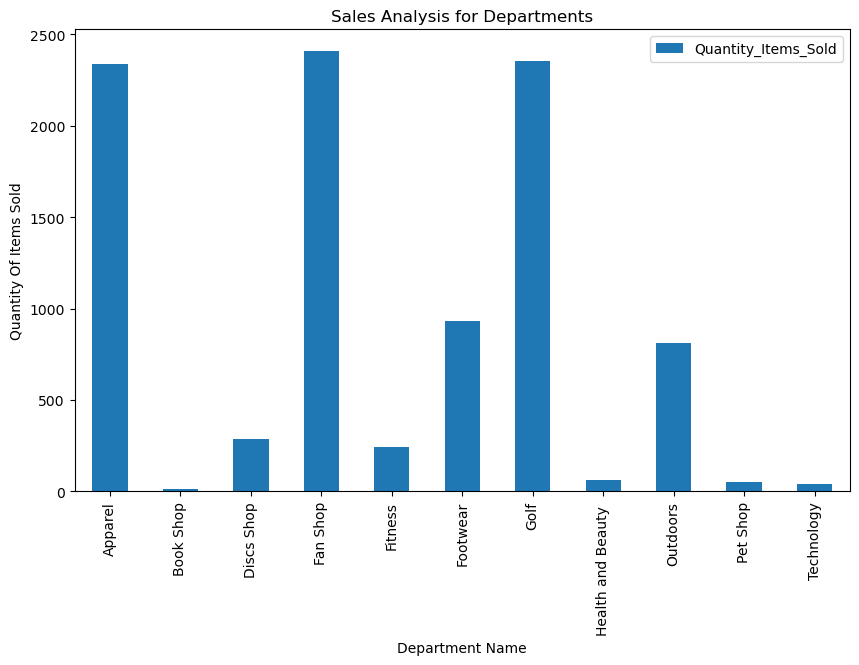

In [23]:
# Importing the matplot library

import matplotlib.pyplot as plt

# Creating a Data visualization chart that shows all departments and the number of items sold by them

department_sales.plot(kind='bar', x = 'Department_Name', y='Quantity_Items_Sold', figsize=(10,6));
plt.title('Sales Analysis for Departments')
plt.xlabel('Department Name')
plt.ylabel('Quantity Of Items Sold')
plt.show()

---

### Observation from Analysis of the bar chart:
Based on review of the data visualization of the various departments' sales information, 
1) Terpbuy is successfully selling more product items in 3 main categories - **'Apparel, Fan Shop, and Golf'** categories. 
2) However, it is to be also noted that the Terbuy product sales are quite low for the **'Book Shop, Health and Beauty, Pet Shop and Technology'** categories. Maybe Terpbuy should consider either dropping these categories or doing aggressive marketing in these areas to drive sales.

---

### Q3. Write a query to show the number of orders placed in each year in which at least one order was placed. Hint: Search online to learn about MySQL’s YEAR() function to query data.

In [20]:
# SQL query to show number of orders that were placed in each year in which at lease one order was placed

yearwise_orderdata = pd.read_sql("""SELECT COUNT(order_id) AS Number_Of_Orders, YEAR(order_date) AS Year_Order_Was_Placed
                                    FROM orders 
                                    GROUP BY YEAR(order_date)
                                    HAVING COUNT(order_id) > 0""", conn)
yearwise_orderdata

/var/folders/yg/3c0fb9yj2gb2dc30lf81q5340000gn/T/ipykernel_15201/1324509280.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  yearwise_orderdata = pd.read_sql("""SELECT COUNT(order_id) AS Number_Of_Orders, YEAR(order_date) AS Year_Order_Was_Placed


,Number_Of_Orders,Year_Order_Was_Placed
0,585,2018
1,708,2019
2,497,2020
3,362,2021


---

### Q4. Using the query you wrote in Question 3, create a data visualization (e.g., a line graph) showing all years and the number of orders placed during each year, to see if there is a trend in ordering. Using a markdown cell, explain what you observe from the analysis.

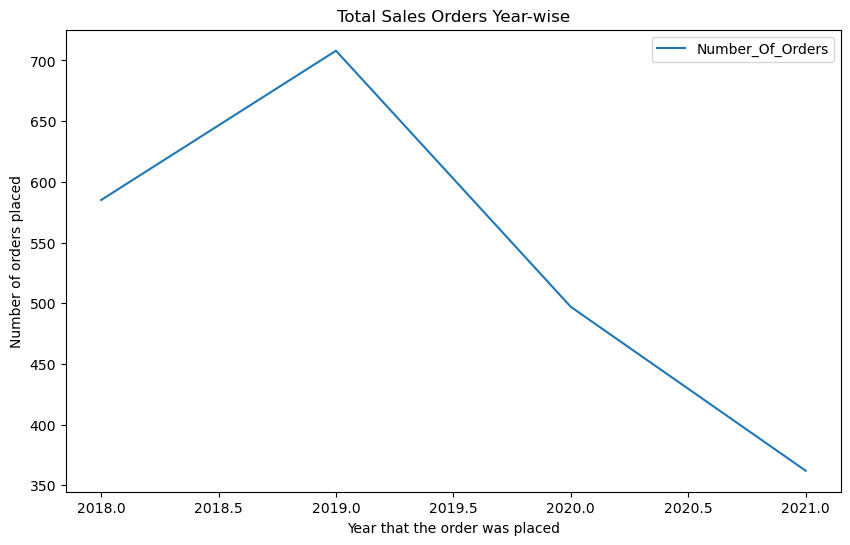

In [24]:
# Creating a Data visualization graph that shows year-wise data of the number of orders that were placed during each year

yearwise_orderdata.plot(kind='line', x ='Year_Order_Was_Placed', y='Number_Of_Orders', figsize=(10,6));
plt.title('Total Sales Orders Year-wise')
plt.xlabel('Year that the order was placed')
plt.ylabel('Number of orders placed')
plt.show()

### Observation from Analysis of the line graph:
Based on review of the data visualization of the various departments' sales information, 
1) Terpbuy Sales increased steadily from 2018 to 2019. 
2) The sales was going well till 2019 beginning. 
3) However, after the first quarter of 2019, we see a steady decline in Terpbuy product sales. This decline sees a further dip at the beginning of 2020 and continues on a downward decline trend.
2) While various factors could have contributed to the decline in sales, we must factor in the onset of COVID-19 and its bad effect on market conditions globally like supply chain issues and delay in product shipments directly affecting customer satisfaction.

In [31]:
# Close the database connection
conn.close()